In [2]:
#include libraries hdf5\numpy
import h5py
import numpy as np


In [3]:
#read data from ../data/hdf5/dayabay_dataset/dayabay_events_AD11.hdf5
file = h5py.File('../data/hdf5/dayabay_dataset/dayabay_events_AD11.hdf5', 'r')
#list all groups
print("Keys: %s" % file.keys())
a_group_key = list(file.keys())[0]

Keys: <KeysViewHDF5 ['events']>


In [7]:
events=file['events']
events

<HDF5 dataset "events": shape (794335,), type "|V43">

In [32]:
#show data format in events
event_data = events[:]
dtype=event_data.dtype
#把dtype每个元素按字符串输出
for name in dtype.names:
    print(name, dtype[name])

time_prompt_s uint32
day uint16
n_det uint8
energy_prompt_MeV float32
energy_delayed_MeV float32
delta_t_us float32
vertex_prompt_x_mm float32
vertex_prompt_y_mm float32
vertex_prompt_z_mm float32
vertex_delayed_x_mm float32
vertex_delayed_y_mm float32
vertex_delayed_z_mm float32


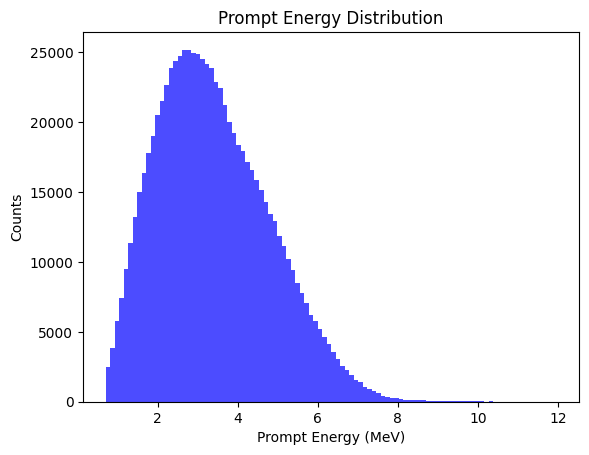

In [11]:
import matplotlib.pyplot as plt
#画出propmt能量的直方图
plt.hist(event_data['energy_prompt_MeV'], bins=100, alpha=0.7, color='blue')
plt.xlabel('Prompt Energy (MeV)')
plt.ylabel('Counts')
plt.title('Prompt Energy Distribution')
plt.show()

In [12]:
#从中筛选energy_prompt_MeV在[0.5,1.5]之间，energy_delayed_MeV在[7,9]之间的事件
prompt_mask = (event_data['energy_prompt_MeV'] >= 2) & (event_data['energy_prompt_MeV'] <= 4)
delayed_mask = (event_data['energy_delayed_MeV'] >= 7) & (event_data['energy_delayed_MeV'] <= 9)
iBD_events = event_data[prompt_mask & delayed_mask]

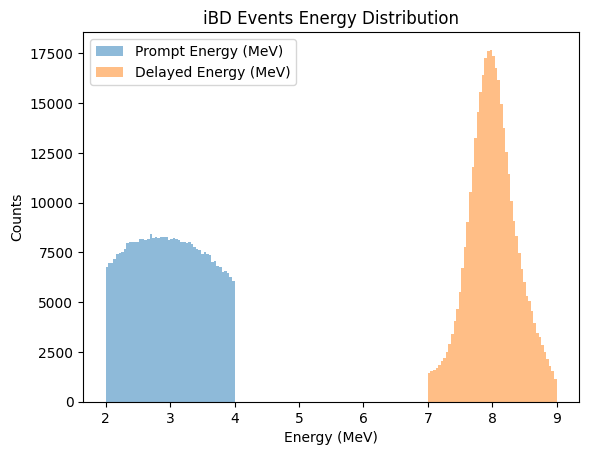

In [13]:
#画出iBDs的能量分布直方图

plt.hist(iBD_events['energy_prompt_MeV'], bins=50, alpha=0.5, label='Prompt Energy (MeV)')
plt.hist(iBD_events['energy_delayed_MeV'], bins=50, alpha=0.5, label='Delayed Energy (MeV)')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.title('iBD Events Energy Distribution')
plt.legend()
plt.show()

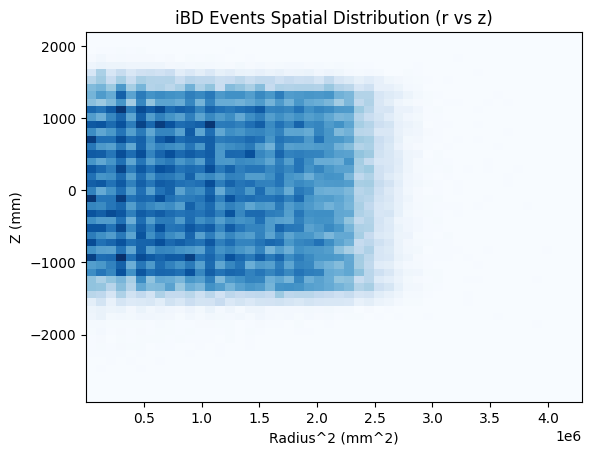

In [21]:
#画出propmt顶点空间分布，在柱坐标下画r^2-z直方图
r_square = iBD_events['vertex_prompt_x_mm']**2 + iBD_events['vertex_prompt_y_mm']**2
z = iBD_events['vertex_prompt_z_mm']
plt.hist2d(r_square, z, bins=50, cmap='Blues')
plt.xlabel('Radius^2 (mm^2)')
plt.ylabel('Z (mm)')
plt.title('iBD Events Spatial Distribution (r vs z)')
plt.colorbar
plt.show()


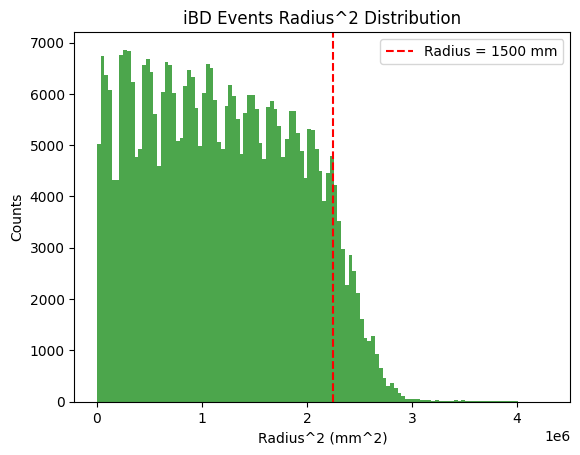

In [26]:
#画出r^2直方图
plt.hist(r_square, bins=120, color='green', alpha=0.7)
plt.xlabel('Radius^2 (mm^2)')
plt.ylabel('Counts')
plt.title('iBD Events Radius^2 Distribution')
#画出半径1500mm的竖线
plt.axvline(x=1500**2, color='red', linestyle='--', label='Radius = 1500 mm')
plt.legend()
plt.show()

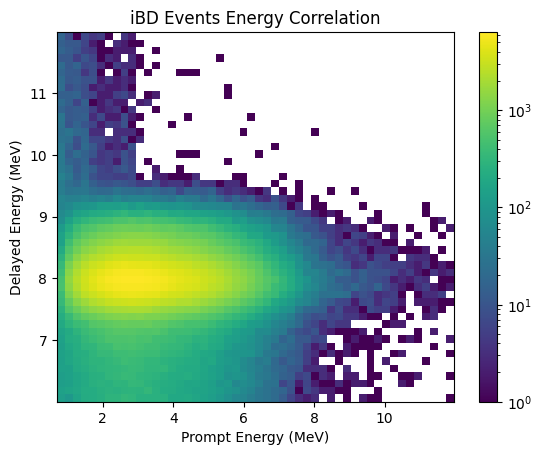

In [31]:
#画两个能量的2dhist,colorbar用log尺度
from matplotlib.colors import LogNorm
plt.hist2d(events['energy_prompt_MeV'], events['energy_delayed_MeV'], bins=50, cmap='viridis', norm=LogNorm())
plt.xlabel('Prompt Energy (MeV)')
plt.ylabel('Delayed Energy (MeV)')
plt.title('iBD Events Energy Correlation')
plt.colorbar()
plt.show()

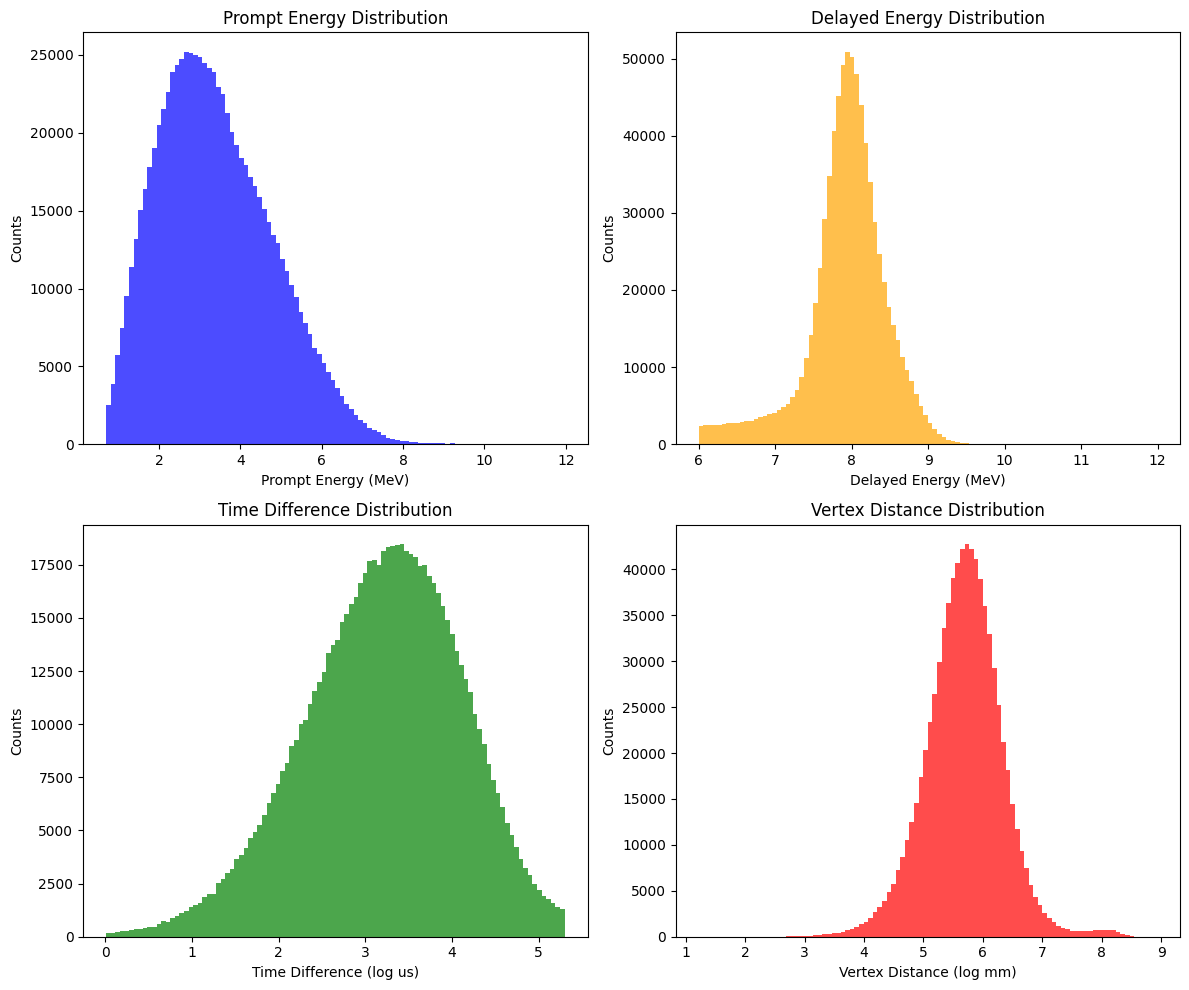

In [35]:
#挑选出events中真正和particle physics有关的维度
energy_prompt = events['energy_prompt_MeV']
energy_delayed = events['energy_delayed_MeV']
log_time_diff = np.log(events['delta_t_us'])
#两个顶点的euclid距离
vertex_prompt = np.vstack((events['vertex_prompt_x_mm'], events['vertex_prompt_y_mm'], events['vertex_prompt_z_mm'])).T
vertex_delayed = np.vstack((events['vertex_delayed_x_mm'], events['vertex_delayed_y_mm'], events['vertex_delayed_z_mm'])).T
log_vertex_distance =np.log(np.linalg.norm(vertex_prompt - vertex_delayed, axis=1)    ) 

#画出四个物理量的分布图
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.hist(energy_prompt, bins=100, color='blue', alpha=0.7)
plt.xlabel('Prompt Energy (MeV)')
plt.ylabel('Counts')
plt.title('Prompt Energy Distribution') 
plt.subplot(2, 2, 2)
plt.hist(energy_delayed, bins=100, color='orange', alpha=0.7)
plt.xlabel('Delayed Energy (MeV)')
plt.ylabel('Counts')
plt.title('Delayed Energy Distribution')
plt.subplot(2, 2, 3)
plt.hist(log_time_diff, bins=100, color='green', alpha=0.7)
plt.xlabel('Time Difference (log us)')
plt.ylabel('Counts')
plt.title('Time Difference Distribution')
plt.subplot(2, 2, 4)
plt.hist(log_vertex_distance, bins=100, color='red', alpha=0.7)
plt.xlabel('Vertex Distance (log mm)')
plt.ylabel('Counts')
plt.title('Vertex Distance Distribution')
plt.tight_layout()
plt.show()
